## Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

## Define functions

### Sigmoid

In [2]:
def sigmoid(z): #Function to compute sigmoid
    s = 1 / (1 + np.exp(-z))
    return s

Text(0.5, 1.0, 'Sigmoid function')

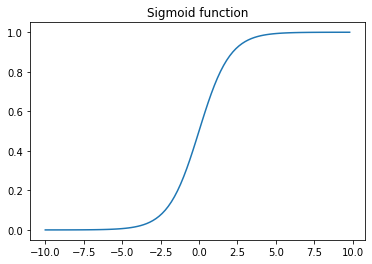

In [3]:
x = np.arange(-10.0, 10.0, 0.2)
sig = sigmoid(x)
plt.plot(x, sig)
plt.title('Sigmoid function')

### Initialize weights

In [4]:
def initialize_weights(dim):              #function to create a vector of zeros of shape (dim, 1) for w and initializes b to 0
    
    b = 0                                 #bias
    w = np.zeros((dim, 1))                #number of features or weight
    return w, b

### Forward and backward propagation

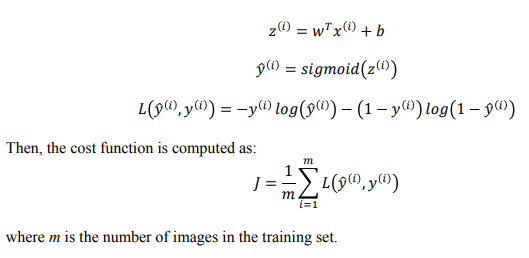

In [5]:
def propagate(w, b, X, Y):                                      #cost function and its gradient for the propagation
  
    m = X.shape[0]   
    A = sigmoid(np.dot(w.T, X.T) + b)                           #activation function
    cost = -1./m* np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))       #cost computation
    
    #Backword propagation to find gradient
    dw = 1./m*np.dot(X.T, (A-Y).T)
    db = 1./m*np.sum(A-Y)
  
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### Gradient descent

In [6]:
def gradient_descent(w, b, X, Y, num_iterations, learning_rate):     #Function to optimize w and b by running a gradient descent algorithm
       
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)                          #Calculation for gradient and cost
        dw = grads["dw"]                                             #Retrieve derivatives from gradients
        db = grads["db"] 
        w = w - learning_rate * dw                                   #Update rule
        b = b - learning_rate * db
        #Record the costs
        if i % 100 == 0:
            costs.append(cost)
            print ("Cost after iteration %i: %f" % (i, cost))        #Print the cost every 100 training examples 
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs
  

### Make predictions

We have already updated the parameters using gradient descent.

In [7]:
def predict(w, b, X):             #Function to predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    m = X.shape[0]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[1], 1)
        
    # Compute vector "A" predicting the probabilities of the picture containing a 1
    A = sigmoid(np.dot(w.T, X.T) + b)
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] > 0.5:
        # Thresholding the predictions at 0.5
          Y_prediction[0,i]=1
        else:
          Y_prediction[0,i]=0
         
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

## Merge functions and run your model

In [8]:
# LOAD DATA
class0 = 0
class1 = 1

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[np.isin(y_train,[class0,class1]),:,:]
y_train = 1*(y_train[np.isin(y_train,[class0,class1])]>class0)
x_test = x_test[np.isin(y_test,[class0,class1]),:,:]
y_test = 1*(y_test[np.isin(y_test,[class0,class1])]>class0)

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
# RESHAPE 

x_train_flat = x_train.reshape(x_train.shape[0],-1)
print(x_train_flat.shape)
print('Train: '+str(x_train_flat.shape[0])+' images and '+str(x_train_flat.shape[1])+' neurons \n')

x_test_flat = x_test.reshape(x_test.shape[0],-1)
print(x_test_flat.shape)
print('Test: '+str(x_test_flat.shape[0])+' images and '+str(x_test_flat.shape[1])+' neurons \n')

# STRANDARIZE
x_train_flat = x_train_flat/255
x_test_flat = x_test_flat/255

(12665, 784)
Train: 12665 images and 784 neurons 

(2115, 784)
Test: 2115 images and 784 neurons 



### Train the model (in training set)

In [10]:
# Initialize parameters with zeros 
w, b = initialize_weights(x_train_flat.shape[1])

# Gradient descent 
learning_rate = 0.005
num_iterations = 2000
parameters, grads, costs = gradient_descent(w, b, x_train_flat, y_train, 2000 , 0.005)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.201280
Cost after iteration 200: 0.120349
Cost after iteration 300: 0.088112
Cost after iteration 400: 0.070691
Cost after iteration 500: 0.059708
Cost after iteration 600: 0.052112
Cost after iteration 700: 0.046521
Cost after iteration 800: 0.042221
Cost after iteration 900: 0.038801
Cost after iteration 1000: 0.036010
Cost after iteration 1100: 0.033685
Cost after iteration 1200: 0.031714
Cost after iteration 1300: 0.030021
Cost after iteration 1400: 0.028548
Cost after iteration 1500: 0.027255
Cost after iteration 1600: 0.026108
Cost after iteration 1700: 0.025083
Cost after iteration 1800: 0.024162
Cost after iteration 1900: 0.023329


### Testing the model (in testing set)




train accuracy: 99.73943939992104 %
test accuracy: 99.90543735224587 %



Text(0.5, 1.0, 'Template')

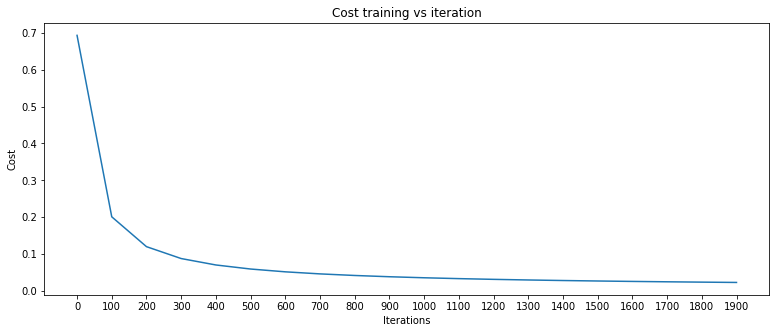

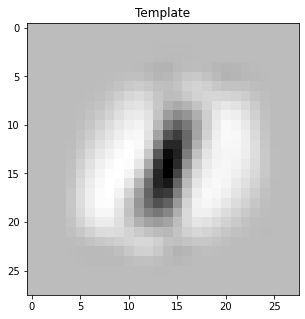

In [11]:
# Retrieve parameters w and b from dictionary "parameters"
w = parameters["w"]
b = parameters["b"]
    
# Predict test/train set examples 
y_prediction_test = predict(w, b, x_test_flat)
y_prediction_train = predict(w, b, x_train_flat)

# Print train/test Errors
print('')
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
print('')

plt.figure(figsize=(13,5))
plt.plot(range(0,2000,100),costs)
plt.title('Cost training vs iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xticks(range(0,2000,100))


plt.figure(figsize=(13,5))
plt.imshow(w.reshape(28,28),cmap="gray_r")
plt.title('Template')


In [12]:
y_prediction_test.shape

(1, 2115)

Extract the 2 classes 5 and 6

In [13]:
# LOAD DATA
class5 = 5
class6 = 6
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[np.isin(y_train,[class5,class6]),:,:]
y_train = 1*(y_train[np.isin(y_train,[class5,class6])]>class5)
x_test = x_test[np.isin(y_test,[class5,class6]),:,:]
y_test = 1*(y_test[np.isin(y_test,[class5,class6])]>class5)

Reshape the images to vectors.
• Standarize by dividing the image vectors by 255

In [14]:
# RESHAPE OF

x_train_flat = x_train.reshape(x_train.shape[0],-1)
print(x_train_flat.shape)
print('Train: '+str(x_train_flat.shape[0])+' images and '+str(x_train_flat.shape[1])+' neurons \n')

x_test_flat = x_test.reshape(x_test.shape[0],-1)
print(x_test_flat.shape)
print('Test: '+str(x_test_flat.shape[0])+' images and '+str(x_test_flat.shape[1])+' neurons \n')

# STRANDARIZE
x_train_flat = x_train_flat/255
x_test_flat = x_test_flat/255

(11339, 784)
Train: 11339 images and 784 neurons 

(1850, 784)
Test: 1850 images and 784 neurons 



In [15]:
# Initialize parameters with zeros (≈ 1 line of code)
w, b = initialize_weights(x_train_flat.shape[1])

# Gradient descent (≈ 1 line of code)
learning_rate = 0.005
num_iterations = 2000
parameters, grads, costs = gradient_descent(w, b, x_train_flat, y_train, num_iterations , 0.005)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.387598
Cost after iteration 200: 0.288959
Cost after iteration 300: 0.240598
Cost after iteration 400: 0.211459
Cost after iteration 500: 0.191734
Cost after iteration 600: 0.177359
Cost after iteration 700: 0.166341
Cost after iteration 800: 0.157582
Cost after iteration 900: 0.150420
Cost after iteration 1000: 0.144436
Cost after iteration 1100: 0.139346
Cost after iteration 1200: 0.134955
Cost after iteration 1300: 0.131120
Cost after iteration 1400: 0.127736
Cost after iteration 1500: 0.124723
Cost after iteration 1600: 0.122020
Cost after iteration 1700: 0.119578
Cost after iteration 1800: 0.117359
Cost after iteration 1900: 0.115333


 To predict the labels for the test set x_test


train accuracy: 96.772202134227 %
test accuracy: 97.24324324324324 %



Text(0.5, 1.0, 'Template')

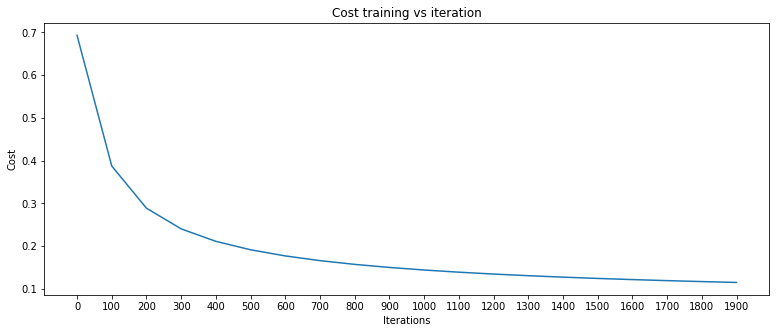

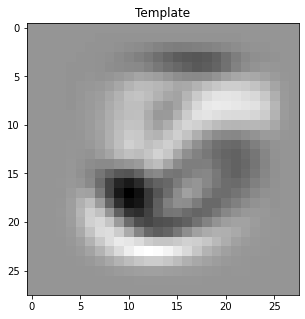

In [16]:
# Retrieve parameters w and b from dictionary "parameters"
w = parameters["w"]
b = parameters["b"]
    
# Predict test/train set examples (≈ 2 lines of code)
y_prediction_test = predict(w, b, x_test_flat)
y_prediction_train = predict(w, b, x_train_flat)

# Print train/test Errors
print('')
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
print('')

plt.figure(figsize=(13,5))
plt.plot(range(0,2000,100),costs)
plt.title('Cost training vs iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xticks(range(0,2000,100))


plt.figure(figsize=(13,5))
plt.imshow(w.reshape(28,28),cmap="gray_r")
plt.title('Template')